In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from task_5 import *

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


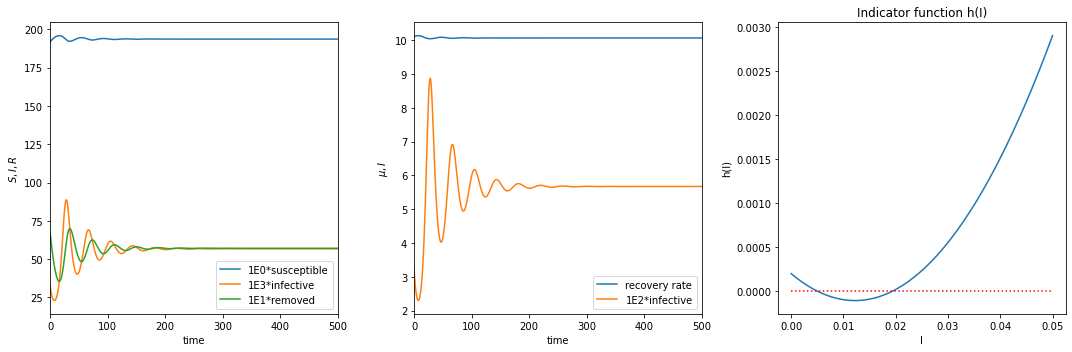

In [15]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end-t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol=1e-8
atol=1e-8

# SIR model parameters
beta=11.5
A=20
d=0.1
nu=1
b=0.01 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

# information
print("Reproduction number R0=", R0(beta, d, nu, mu1))
print('Globally asymptotically stable if beta <=d+nu+mu0. This is', beta <= d+nu+mu0)

# simulation
rng = np.random.default_rng(random_state)

SIM0 = rng.uniform(low=(190, 0, 1), high=(199,0.1,8), size=(3,))

time = np.linspace(t_0,t_end,NT)
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)

fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(sol.t, sol.y[0]-0*sol.y[0][0], label='1E0*susceptible')
ax[0].plot(sol.t, 1e3*sol.y[1]-0*sol.y[1][0], label='1E3*infective')
ax[0].plot(sol.t, 1e1*sol.y[2]-0*sol.y[2][0], label='1E1*removed')
ax[0].set_xlim([0, 500])
ax[0].legend()
ax[0].set_xlabel("time")
ax[0].set_ylabel(r"$S,I,R$")

ax[1].plot(sol.t, mu(b, sol.y[1], mu0, mu1), label='recovery rate')
ax[1].plot(sol.t, 1e2*sol.y[1], label='1E2*infective')
ax[1].set_xlim([0, 500])
ax[1].legend()
ax[1].set_xlabel("time")
ax[1].set_ylabel(r"$\mu,I$")

I_h = np.linspace(-0.,0.05,100)
ax[2].plot(I_h, h(I_h, mu0, mu1, beta, A, d, nu, b))
ax[2].plot(I_h, 0*I_h, 'r:')
#ax[2].set_ylim([-0.1,0.05])
ax[2].set_title("Indicator function h(I)")
ax[2].set_xlabel("I")
ax[2].set_ylabel("h(I)")

fig.tight_layout()

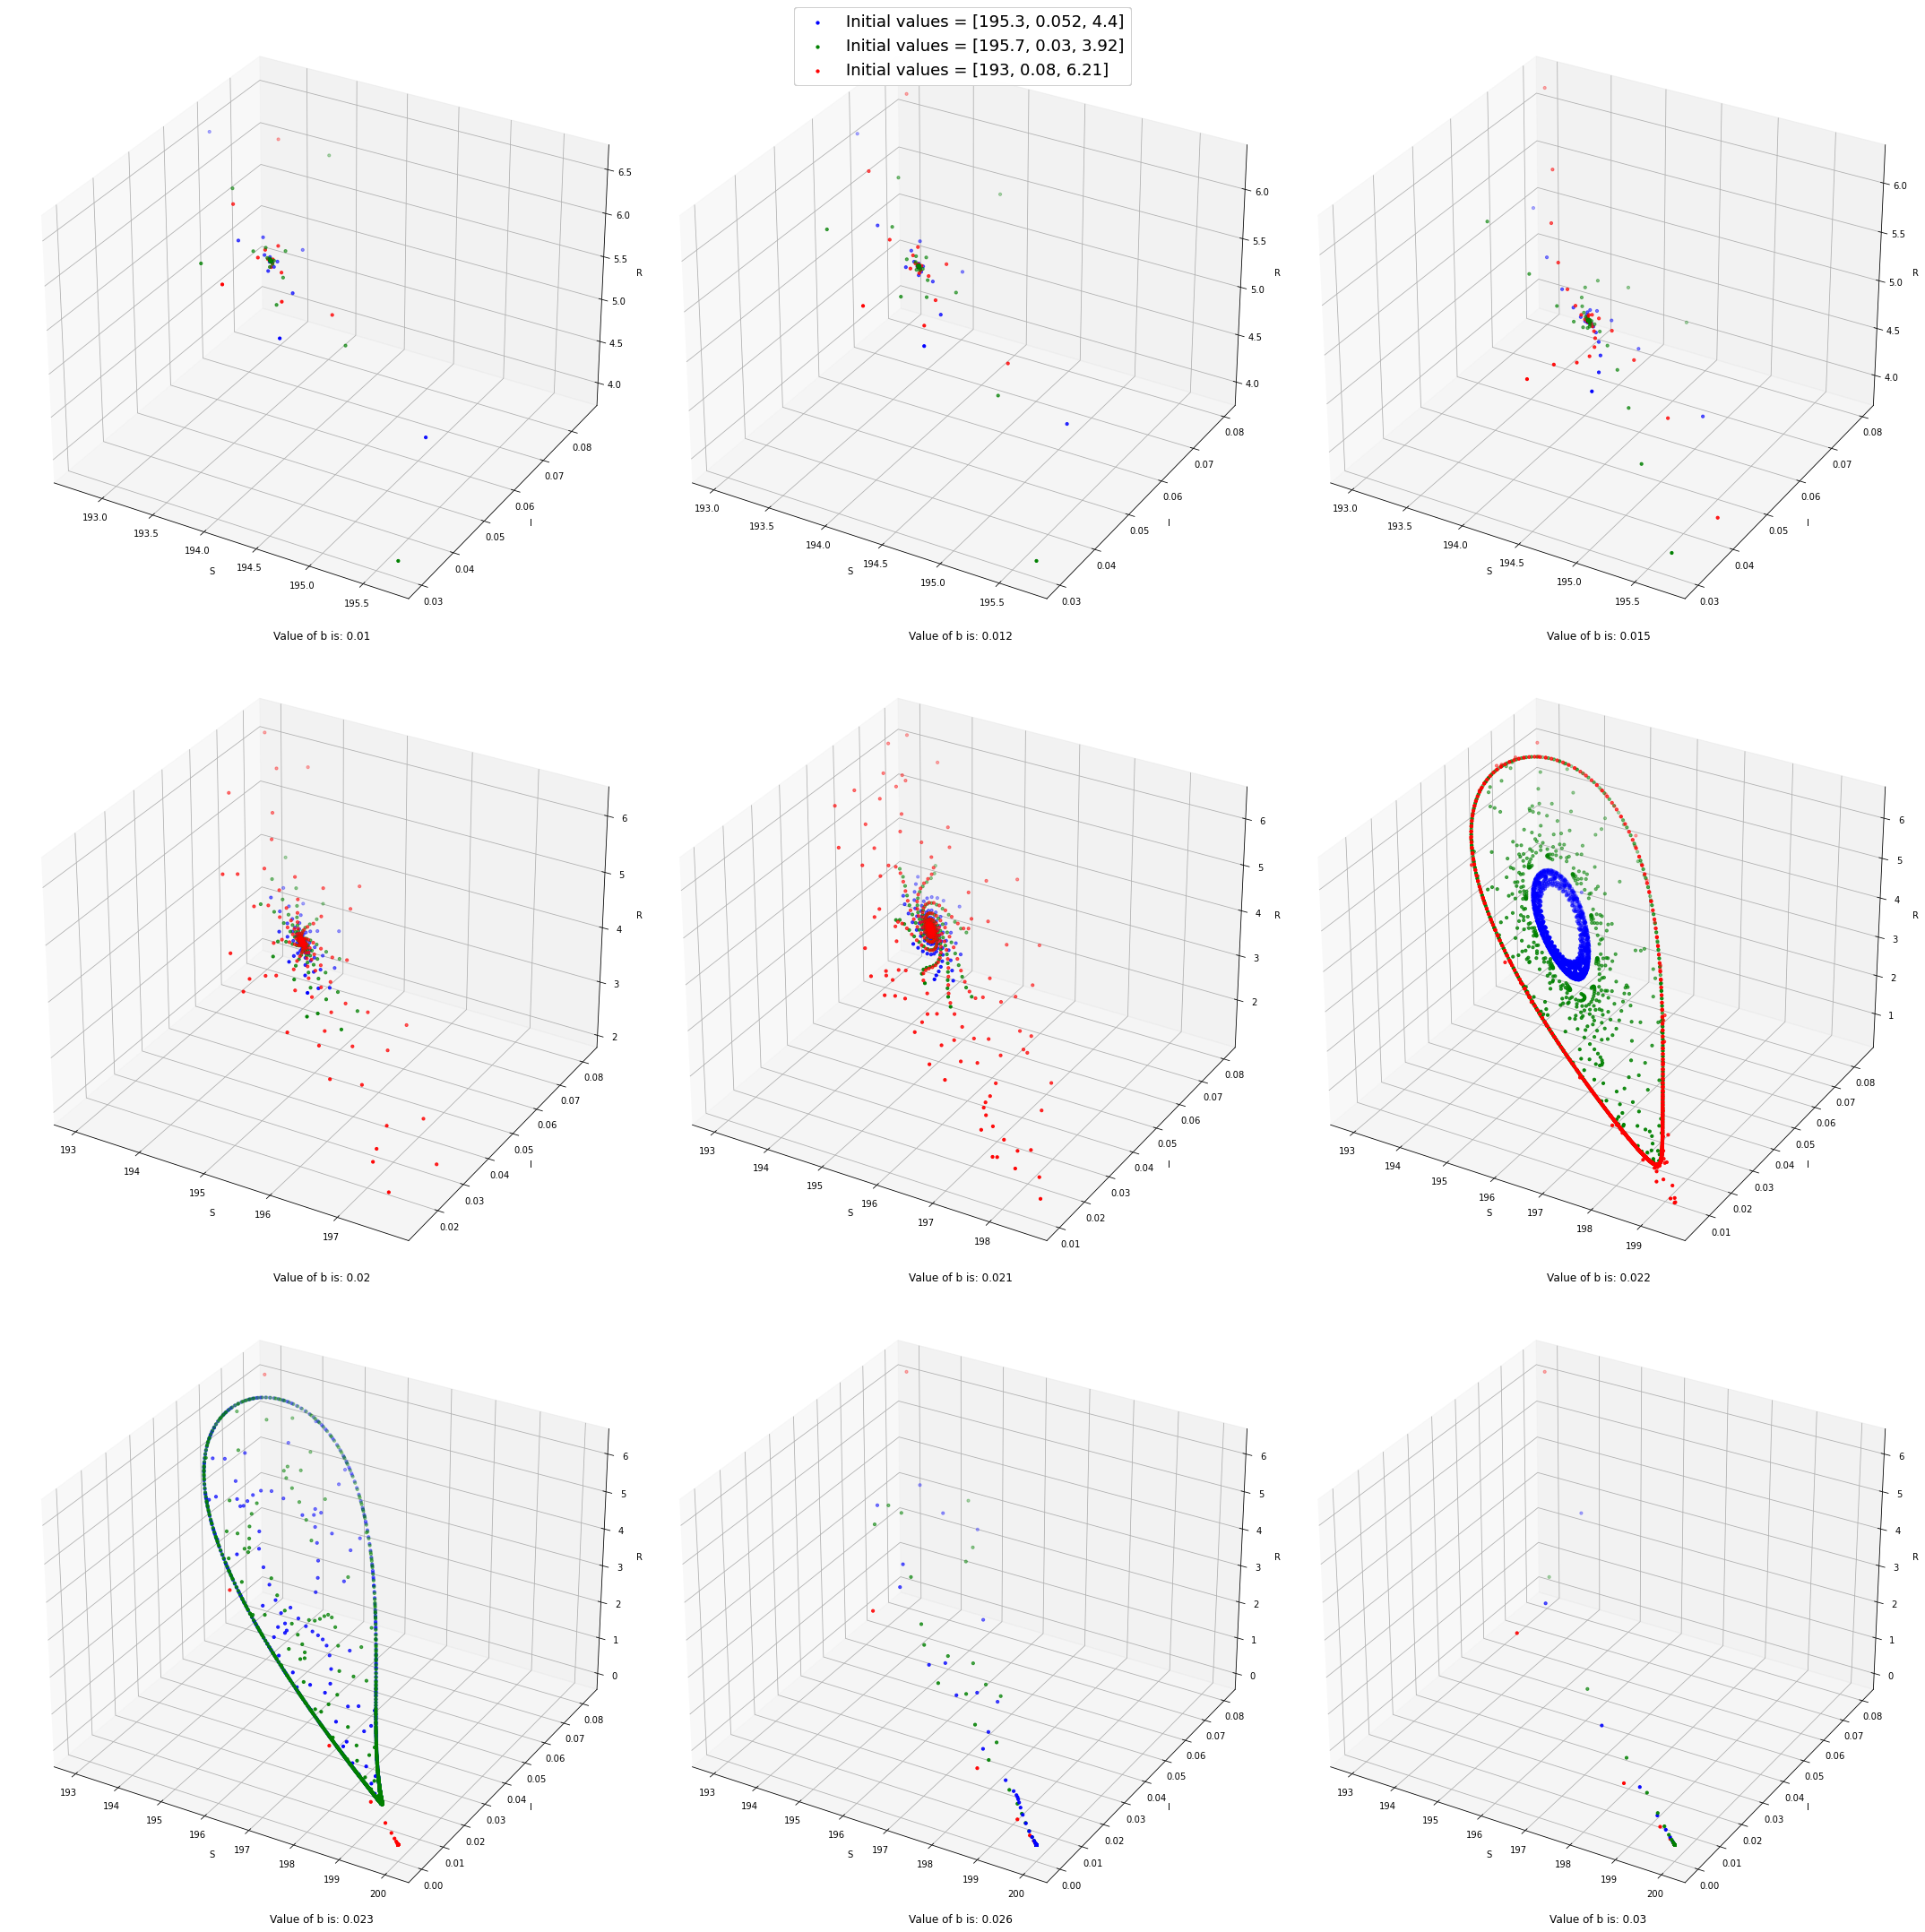

In [16]:
number_of_plots = round((0.03 - 0.01) / 0.001)
fig=plt.figure(figsize=(30, 30))
cmap = ["winter", "summer", "cool"]

for idx, b in enumerate([0.01, 0.012, 0.015, 0.02, 0.021, 0.022, 0.023, 0.026, 0.03]):
    ax = fig.add_subplot(3, 3, idx + 1, projection="3d")
    time = np.linspace(t_0,15000,NT)

    SIM0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=10, c="b", label=r"Initial values = [195.3, 0.052, 4.4]")

    SIM0 = [195.7, 0.03, 3.92] # what happens with this initial condition when b=0.022?
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=10, c="g", label=r"Initial values = [195.7, 0.03, 3.92]")

    SIM0 = [193, 0.08, 6.21] # what happens with this initial condition when b=0.022?
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=10, c="r", label=r"Initial values = [193, 0.08, 6.21]")

    ax.set_xlabel("S")
    ax.set_ylabel("I")
    ax.set_zlabel("R")
    ax.set_title("Value of b is: " + str(b), y=-0.01)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', prop={'size': 18})

fig.tight_layout()